In [5]:
# googletrans 라이브러리 다운로드
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=20c98e8224b865c92ae67111a8a699e364538138f3fc843c6fc7a493688a33e1
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:


In [6]:
# translate 라이브러리 다운로드
!pip install translate

In [7]:
# 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import googletrans
from translate import Translator

In [11]:
train_path = "/content/drive/MyDrive/네이버 부스트 캠프/NLP_project_6-7W/EDA/train_preprocess_v1.csv"
train_df = pd.read_csv(train_path)

In [12]:
train_df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도 있고 반전도 있고 여느 한국 영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고, 사랑도 있고 재미도 있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근 권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해 주세요.,주택청약 무주택 기준 변경해 주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사 후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯 뿌듯하네요!!,꼬옥 실제로 한번 뵈어요 뿌 뿌 푸~!~!,0.0,0.0


In [18]:
# 출처가 영화 리뷰(nsmc) 및 slack이면서 sampled인 데이터 추출
nsmc_slack_df = train_df[train_df['source'].str.contains('(slack|nsmc).*sampled', case=False, na=False)]

<ipython-input-18-c6a04f2458c9>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  nsmc_slack_df = train_df[train_df['source'].str.contains('(slack|nsmc).*sampled', case=False, na=False)]


In [20]:
# 데이터셋 확인
nsmc_slack_df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도 있고 반전도 있고 여느 한국 영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고, 사랑도 있고 재미도 있네요.",2.2,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사 후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯 뿌듯하네요!!,꼬옥 실제로 한번 뵈어요 뿌 뿌 푸~!~!,0.0,0.0
7,boostcamp-sts-v1-train-007,nsmc-sampled,이렇게 귀여운 쥐들은 처음이네요.ㅎㅎㅎ,이렇게 지겨운 공포영화는 처음..,0.6,0.0
11,boostcamp-sts-v1-train-011,nsmc-sampled,극의 전개가 너무 느릿하여 답답합니다,전개가 너무 느려서 속 터진다,3.8,1.0


In [19]:
# 데이터셋 확인
print(f"추출한 데이터의 개수 : {len(nsmc_slack_df)}")
print(f"전체 데이터에서 추출한 데이터의 비율 : {(len(nsmc_slack_df) / len(train_df)) * 100: .2f}%")

추출한 데이터의 개수 : 4320
전체 데이터에서 추출한 데이터의 비율 :  46.33%


In [21]:
# petition 또는 rtt 데이터 들어있는지 확인
print(len(nsmc_slack_df[nsmc_slack_df['source'].str.contains('petition|rtt', case=False, na=False)]))

0


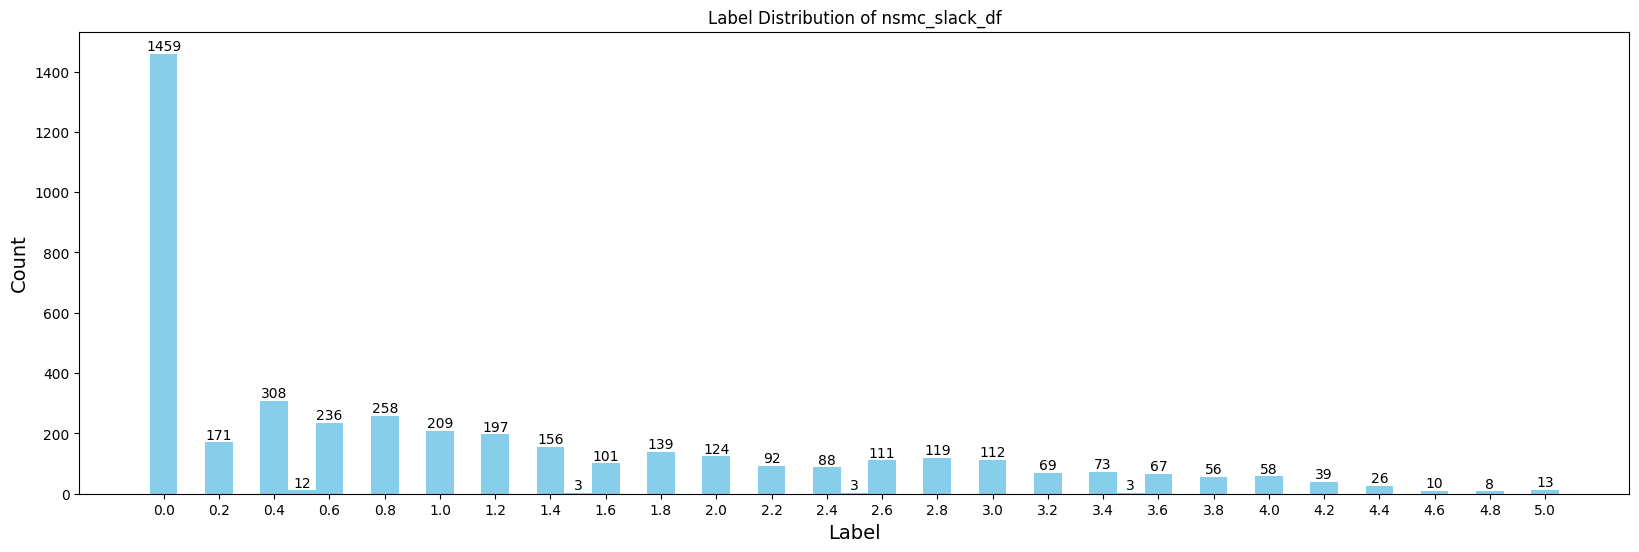

In [30]:
# 데이터 라벨 분포도 시각화
label_counts = nsmc_slack_df["label"].value_counts().sort_index()

plt.figure(figsize = (20, 6))
bars = plt.bar(label_counts.index, label_counts.values, color = "skyblue", width=0.1)

plt.title("Label Distribution of nsmc_slack_df")
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([round(x * 0.2, 1) for x in range(0, 26)])

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.show()

In [32]:
# 영어로 번역 후 다시 한글로 재번역하는 코드
# googletrans 라이브러리 사용해서 번역

# 데이터 프레미 변환을 위한 리스트 선언
sources = []
sentences = []
translation_sentences = []
labels = []

translator = googletrans.Translator()

total = len(nsmc_slack_df)

for i in range(total):

  # 번역할 데이터
  sentence = nsmc_slack_df.iloc[i, 3]

  # 영어 -> 한글
  en_sentence = translator.translate(sentence, dest="en", src="auto")
  ko_sentence = translator.translate(en_sentence.text, dest="ko", src="auto")

  # 데이터프레임 변환을 위해 리스트에 추가
  sources.append(nsmc_slack_df.iloc[i, 1])
  sentences.append(nsmc_slack_df.iloc[i, 2])
  translation_sentences.append(ko_sentence.text)
  labels.append(nsmc_slack_df.iloc[i, 4])

  # 변화를 보기 위한 출력문
  print(f"[{i}/{total}]")
  print(f"원본 문장 : {sentence}")
  print(f"원본 -> En : {en_sentence.text}")
  print(f"En -> Ko : {ko_sentence.text}")
  print("-" * 50)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[3320/4320]
원본 문장 : 추천 팀 멋진 분들과 점심을 함께 하였습니다!
원본 -> En : Recommended team had lunch with wonderful people!
En -> Ko : 추천 팀은 멋진 사람들과 점심을 먹었습니다!
--------------------------------------------------
[3321/4320]
원본 문장 : 다시 생각해도 정말 재밌는 드라마였어요^^
원본 -> En : It was a really fun drama even if I thought about it again ^^
En -> Ko : 다시 생각해도 정말 재미있는 드라마였습니다 ^^
--------------------------------------------------
[3322/4320]
원본 문장 : 제주에서 겨울나기 (눈썰매로 보드 타버리기)
원본 -> En : Winter in Jeju (burning board with a sled)
En -> Ko : Jeju의 겨울 (썰매가있는 불타 보드)
--------------------------------------------------
[3323/4320]
원본 문장 : 지금까지 영화관서 본 영화 중 최악.
원본 -> En : The worst of the movies I've seen in the movie theater so far.
En -> Ko : 지금까지 영화관에서 본 영화 중 최악의 영화.
--------------------------------------------------
[3324/4320]
원본 문장 : 이런 착각…! ㅋㅋㅋ
원본 -> En : This illusion…!lol
En -> Ko : 이 환상…! lol
--------------------------------------------------
[3325/4320]
원본 문장 : 헉 저는 소식 듣고 들어가자마자 마감 ㅠ

In [35]:
# 리스트 확인
if len(sources) == len(sentences) == len(translation_sentences) == len(labels):
  print("yes!!")
else:
  print("no")

yes!!


In [38]:
# binary_label 값으로 변경
# label 값이 2.5 이상이면 1를 아니면 0을 돌려주는 코드
binary_labels = [1.0 if l >= 2.5 else 0.0 for l in labels]

In [39]:
# 데이터 프레임으로 변환
ids = []
num = 9318 + 1
for i in range(num , num+len(nsmc_slack_df)):
  ids.append(f"boostcamp-sts-v1-train-{i}")
sentence_translate_df = pd.DataFrame({
                                      "id" : ids,
                                      "source" : sources,
                                      "sentence_1" : sentences,
                                      "sentence_2" : translation_sentences,
                                      "label" : labels,
                                      "binary_label" : binary_labels
                                      })
# csv 파일로 변환
sentence_translate_df.to_csv("train_BT.csv", index=False)

In [40]:
# 생성된 데이터 프레임 확인
print(f"데이터 프레임의 개수 : {len(sentence_translate_df)}")
sentence_translate_df.head()

데이터 프레임의 개수 : 4320


,id,source,sentence_1,sentence_2,label,binary_label
0,boostcamp-sts-v1-train-9319,nsmc-sampled,스릴도 있고 반전도 있고 여느 한국 영화 쓰레기들하고는 차원이 다르네요~,"반전, 사랑과 재미가 있습니다.",2.2,0.0
1,boostcamp-sts-v1-train-9320,slack-sampled,입사 후 처음 대면으로 만나 반가웠습니다.,화상에서만 만나고 진짜를 만났습니다.,3.0,1.0
2,boostcamp-sts-v1-train-9321,slack-sampled,뿌듯 뿌듯하네요!!,나는 실제로 당신을 한 번 본다.,0.0,0.0
3,boostcamp-sts-v1-train-9322,nsmc-sampled,이렇게 귀여운 쥐들은 처음이네요.ㅎㅎㅎ,이것은 이와 같은 첫 번째 공포 영화입니다.,0.6,0.0
4,boostcamp-sts-v1-train-9323,nsmc-sampled,극의 전개가 너무 느릿하여 답답합니다,개발이 너무 느려서 터져 나옵니다,3.8,1.0
